<CENTER>
    
# **Proyecto: Automatización de Análisis y Visualización de Datos Climáticos**

Usuario [Grupo Bases de Programacion ](https://github.com/KarlaVillamar/Proyecto-Bases-de-Programacion.git)

### **Integrantes:**
- Aguilar, Jordan
- Franco, Valeria
- Villamar, Karla



### **Introducción:** 
En la actualidad, el cambio climático está teniendo un importante impacto negativo en la salud física y mental de las personas (Frontiers, 2023). La creciente frecuencia e intensidad de los fenómenos meteorológicos extremos originados en gran parte por el cambio climático han provocado que muchas ciudades de Estados Unidos se enfrenten desafíos sin precedentes que afectan la vida urbana y la salud de las personas . Estos cambios se asocian a un aumento de enfermedades como problemas de salud mental, ansiedad, estrés, tensión, depresión, trastorno de estrés postraumático y pensamientos suicidas, así como a repercusiones directas en la salud física, como estrés térmico y complicaciones cardiovasculares (Psychiatry.org, 2022). La automatización y visualización adecuada de los datos clínicos no sólo implica un diagnóstico preciso y oportuno, sino también realizar ese diagnóstico con un mínimo de recursos (Ali et al., 2024). 
La capacidad de procesar y analizar datos climáticos de forma rápida y eficiente es fundamental para comprender el cambio climático y sus repercusiones en la ciencia medioambiental (Al-Hashimi et al. 2023). Este estudio se centra en evaluar las condiciones climáticas de 10 ciudades de Estados Unidos, automatizando la carga, limpieza, análisis y visualización de datos que incluye 100 000 registros climáticos. La precisión y coherencia de los resultados obtenidos se mejorará mediante bucles y funciones de Python que acelerarán el procesamiento de datos y aumentarán la eficiencia y reproducibilidad de los análisis. Estos análisis mejorarán nuestra comprensión de la dinámica climática y pueden ser útiles para futuras investigaciones y políticas medioambientales.

### **Objetivo General:** 
- Evaluar y caracterizar las condiciones climáticas de varias ciudades de Estados Unidos automatizando el análisis de los datos climáticos.


#### **Objetivos Específicos** 
- Recopilar y procesar los datos climáticos de cada una de las ciudades seleccionadas en Estados Unidos, asegurando una correcta limpieza y organización de los datos.
- Analizar las tendencias de temperatura, humedad, precipitaciones y velocidad del viento a lo largo del tiempo en diferentes ciudades, e identificar patrones significativos y cambios estacionales.
- Investigar las condiciones meteorológicas extremas, como las altas temperaturas y la humedad, para identificar posibles riesgos para la salud, como el estrés térmico y otros impactos relacionados con el clima.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### 1. Carga y Preparación de Datos

#### 1.1 Cargar el conjunto de datos utilizando pandas.

In [2]:
data=pd.read_csv("Weather_Data-1.csv")

In [3]:
data

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,1/14/2024 21:12,10.683001,41.195754,4.020119,8.233540
1,San Diego,5/17/2024 15:22,8.734140,58.319107,9.111623,27.715161
2,San Diego,5/11/2024 9:30,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2/26/2024 17:32,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,4/29/2024 13:23,39.808213,72.899908,9.598282,29.898622
...,...,...,...,...,...,...
999995,Dallas,1/1/2024 20:29,23.416877,37.705024,3.819833,16.538119
999996,San Antonio,1/20/2024 15:59,6.759080,40.731036,8.182785,29.005558
999997,New York,4/14/2024 8:30,15.664465,62.201884,3.987558,0.403909
999998,Chicago,5/12/2024 20:10,18.999994,63.703245,4.294325,6.326036


#### 1.2 Realizar limpieza básica de datos, eliminando duplicados y modificando los tipos de datos en caso de ser necesario.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Location          1000000 non-null  object 
 1   Date_Time         1000000 non-null  object 
 2   Temperature_C     1000000 non-null  float64
 3   Humidity_pct      1000000 non-null  float64
 4   Precipitation_mm  1000000 non-null  float64
 5   Wind_Speed_kmh    1000000 non-null  float64
dtypes: float64(4), object(2)
memory usage: 45.8+ MB


In [5]:
#Transformar Date_Time a formato de fecha y hora estándar
data['Date_Time'] = pd.to_datetime(data['Date_Time'])
data

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:00,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:00,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:00,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:00,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:00,39.808213,72.899908,9.598282,29.898622
...,...,...,...,...,...,...
999995,Dallas,2024-01-01 20:29:00,23.416877,37.705024,3.819833,16.538119
999996,San Antonio,2024-01-20 15:59:00,6.759080,40.731036,8.182785,29.005558
999997,New York,2024-04-14 08:30:00,15.664465,62.201884,3.987558,0.403909
999998,Chicago,2024-05-12 20:10:00,18.999994,63.703245,4.294325,6.326036


In [6]:
# Buscar si hay duplicados 
duplicad = data.duplicated(subset=['Location', 'Date_Time'], keep=False)
print("Datos duplicados en la columna 'Date_Time:")
print(duplicad)

Datos duplicados en la columna 'Date_Time:
0          True
1          True
2         False
3         False
4         False
          ...  
999995    False
999996     True
999997     True
999998     True
999999    False
Length: 1000000, dtype: bool


In [7]:
#Eliminar duplicados
x= data.drop_duplicates(subset=['Location','Date_Time'], keep='first', inplace=False, ignore_index=False)
x

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:00,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:00,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:00,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:00,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:00,39.808213,72.899908,9.598282,29.898622
...,...,...,...,...,...,...
999990,New York,2024-01-01 11:49:00,20.245916,31.677558,9.801482,24.029331
999991,New York,2024-02-14 03:55:00,4.210758,45.683075,2.053384,22.351735
999992,San Jose,2024-01-22 15:43:00,14.067557,45.668296,0.296306,11.883972
999995,Dallas,2024-01-01 20:29:00,23.416877,37.705024,3.819833,16.538119


#### 1.3 Implementar funciones para cada paso de la limpieza de datos para facilitar la reutilización del código.

In [8]:
# Crear función para eliminar duplicados
def supr_duplicados(DataFrame, Columnas):
    no_duplicados = DataFrame.drop_duplicates(subset=Columnas, ignore_index = True)
    return no_duplicados

datosfinales = supr_duplicados(data, ['Location', 'Date_Time'])
datosfinales

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:00,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:00,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:00,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:00,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:00,39.808213,72.899908,9.598282,29.898622
...,...,...,...,...,...,...
786464,New York,2024-01-01 11:49:00,20.245916,31.677558,9.801482,24.029331
786465,New York,2024-02-14 03:55:00,4.210758,45.683075,2.053384,22.351735
786466,San Jose,2024-01-22 15:43:00,14.067557,45.668296,0.296306,11.883972
786467,Dallas,2024-01-01 20:29:00,23.416877,37.705024,3.819833,16.538119


#### 1.4 Realizar resumen estadístico de los datos.

In [9]:
datosfinales.iloc[:,2:].describe()

,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
count,786469.000000,786469.000000,786469.000000,786469.000000
mean,14.767244,60.029866,5.107317,15.001548
std,14.484573,17.314466,2.949482,8.662800
min,-19.969311,30.000009,0.000009,0.000051
25%,2.260914,45.041518,2.575863,7.497307
50%,14.759720,60.025753,5.104687,14.997622
75%,27.256960,75.033459,7.613750,22.514125
max,39.999801,89.999977,14.926332,29.999973


In [10]:
# Estadística descriptica de la variable temperatura por locación
PromTemp = datosfinales.groupby('Location')[['Temperature_C']].describe()
PromTemp

Temperature_C                                             \
                     count       mean        std        min       25%   
Location                                                                
Chicago            78734.0  15.045266  14.440476  -9.999959  2.574750   
Dallas             78700.0  14.973336  14.481602  -9.999588  2.383706   
Houston            78787.0  14.893002  14.440294  -9.999874  2.358749   
Los Angeles        78405.0  15.121807  14.486618  -9.999913  2.548060   
New York           78514.0  14.997349  14.415080  -9.999870  2.531978   
Philadelphia       78678.0  14.985475  14.406098  -9.999282  2.514576   
Phoenix            78806.0  12.758808  14.765683 -19.969311  0.239635   
San Antonio        78706.0  15.037004  14.438606  -9.999964  2.516044   
San Diego          78528.0  14.917072  14.417957  -9.999986  2.428470   
San Jose           78611.0  14.948212  14.393331  -9.999966  2.480728   

                                               
                    50%        75%        max  
Location                                       
Chicago       15.052587  27.546153  39.998561  
Dallas        15.013138  27.516724  39.998804  
Houston       14.893656  27.330327  39.998913  
Los Angeles   15.109511  27.670073  39.999592  
New York      14.973082  27.492992  39.999801  
Philadelphia  15.001733  27.445691  39.999642  
Phoenix       12.702985  25.269871  39.998889  
San Antonio   15.135638  27.495075  39.998314  
San Diego     14.802373  27.393347  39.999692  
San Jose      14.997264  27.346540  39.997461

### 2. Automatización del Análisis Exploratorio de Datos (EDA)

#### 2.1 Utilizar estructuras de datos para almacenar y manipular información relevante. Pueden ser algunas columnas del conjunto de datos.


In [11]:
datosfinales

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:00,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:00,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:00,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:00,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:00,39.808213,72.899908,9.598282,29.898622
...,...,...,...,...,...,...
786464,New York,2024-01-01 11:49:00,20.245916,31.677558,9.801482,24.029331
786465,New York,2024-02-14 03:55:00,4.210758,45.683075,2.053384,22.351735
786466,San Jose,2024-01-22 15:43:00,14.067557,45.668296,0.296306,11.883972
786467,Dallas,2024-01-01 20:29:00,23.416877,37.705024,3.819833,16.538119


In [12]:
#Función para separar meses y años
def month_year(Dt,columna):
    Dt[columna] = pd.to_datetime(Dt[columna])
    Dt['Month'] = Dt[columna].dt.month
    Dt['Year'] = Dt[columna].dt.year
    return Dt
    
df2 = month_year(datosfinales, "Date_Time")
df2

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Month,Year
0,San Diego,2024-01-14 21:12:00,10.683001,41.195754,4.020119,8.233540,1,2024
1,San Diego,2024-05-17 15:22:00,8.734140,58.319107,9.111623,27.715161,5,2024
2,San Diego,2024-05-11 09:30:00,11.632436,38.820175,4.607511,28.732951,5,2024
3,Philadelphia,2024-02-26 17:32:00,-8.628976,54.074474,3.183720,26.367303,2,2024
4,San Antonio,2024-04-29 13:23:00,39.808213,72.899908,9.598282,29.898622,4,2024
...,...,...,...,...,...,...,...,...
786464,New York,2024-01-01 11:49:00,20.245916,31.677558,9.801482,24.029331,1,2024
786465,New York,2024-02-14 03:55:00,4.210758,45.683075,2.053384,22.351735,2,2024
786466,San Jose,2024-01-22 15:43:00,14.067557,45.668296,0.296306,11.883972,1,2024
786467,Dallas,2024-01-01 20:29:00,23.416877,37.705024,3.819833,16.538119,1,2024


In [13]:
def convertir_meses(data, nombre_columna):
    mapeo_meses = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'}
    data[nombre_columna] = data[nombre_columna].apply(lambda x: mapeo_meses[x] if x in mapeo_meses else x)
    return data

df3 = convertir_meses(df2,'Month')
df3

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Month,Year
0,San Diego,2024-01-14 21:12:00,10.683001,41.195754,4.020119,8.233540,Enero,2024
1,San Diego,2024-05-17 15:22:00,8.734140,58.319107,9.111623,27.715161,Mayo,2024
2,San Diego,2024-05-11 09:30:00,11.632436,38.820175,4.607511,28.732951,Mayo,2024
3,Philadelphia,2024-02-26 17:32:00,-8.628976,54.074474,3.183720,26.367303,Febrero,2024
4,San Antonio,2024-04-29 13:23:00,39.808213,72.899908,9.598282,29.898622,Abril,2024
...,...,...,...,...,...,...,...,...
786464,New York,2024-01-01 11:49:00,20.245916,31.677558,9.801482,24.029331,Enero,2024
786465,New York,2024-02-14 03:55:00,4.210758,45.683075,2.053384,22.351735,Febrero,2024
786466,San Jose,2024-01-22 15:43:00,14.067557,45.668296,0.296306,11.883972,Enero,2024
786467,Dallas,2024-01-01 20:29:00,23.416877,37.705024,3.819833,16.538119,Enero,2024


In [14]:
df3.groupby("Month")["Date_Time"]

#### 2.2 Implementar funciones que ayuden a calcular estadísticas descriptivas como la media, mediana y desviación estándar de las variables numéricas.


In [15]:
def calcular_estadisticas(dtf):
    estadisticas = {}
    for columna in dtf.select_dtypes(include='number').columns:
        if columna!="Year":
            media = dtf[columna].mean()
            mediana = dtf[columna].median()
            desviacion_estandar = dtf[columna].std()
        
            estadisticas[columna] = {'Media': media, 'Mediana': mediana,'Desviacion_estandar': desviacion_estandar}
    return pd.DataFrame(estadisticas)

calcular_estadisticas(df3)

,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
Media,14.767244,60.029866,5.107317,15.001548
Mediana,14.759720,60.025753,5.104687,14.997622
Desviacion_estandar,14.484573,17.314466,2.949482,8.662800


##### 2.3 Realiza análisis específicos al conjunto de datos. Por ejemplo, encontrar el mes con la temperatura promedio más alta, el año con más precipitaciones, o la ciudad que tenga las velocidades de viento más altas.


In [16]:
z=df3.groupby(["Location","Month"])[["Temperature_C","Humidity_pct","Precipitation_mm","Wind_Speed_kmh"]].mean()

In [17]:
#Función para determinar máximo valor promedio de cada variable para cada ciudad y el mes.
def valorpromediomayor (variable,data,columna):
    maximo=data[columna].idxmax()
    max_1=data[columna].max()
    print(f"La {variable} promedio mas alta es de {data[columna].max():.2f} °C y se registra en el mes de {maximo[1]} en la ubicación de {maximo[0]}.")

In [18]:
variable="temperatura"
columna="Temperature_C"
valorpromediomayor(variable,z,columna)

La temperatura promedio mas alta es de 15.39 °C y se registra en el mes de Mayo en la ubicación de Los Angeles.


In [19]:
variable="velocidad del viento"
columna="Wind_Speed_kmh"
valorpromediomayor(variable,z,columna)

La velocidad del viento promedio mas alta es de 15.16 °C y se registra en el mes de Mayo en la ubicación de New York.


In [20]:
# Ciudad con velocidades de viento mas altas
zmax=df3.groupby(["Location"])[["Temperature_C","Humidity_pct","Precipitation_mm","Wind_Speed_kmh"]].max()

def valormax (variable,data,columna):
    maximo=data[columna].idxmax()
    max_1=data[columna].max()
    print(f"La ciudad con {variable} mas alta es {maximo} , cuyo valor es de {max_1:.5f} km/h.")

variable="la velocidad de viento"
columna="Wind_Speed_kmh"
valormax(variable,zmax,columna)

La ciudad con la velocidad de viento mas alta es Philadelphia , cuyo valor es de 29.99997 km/h.


### 3. Manipulación de Datos con Pandas

#### 3.1 Crear funciones para realizar operaciones de agrupamiento y agregación.

In [21]:
dff = df3.drop('Date_Time', axis=1)
dff

,Location,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Month,Year
0,San Diego,10.683001,41.195754,4.020119,8.233540,Enero,2024
1,San Diego,8.734140,58.319107,9.111623,27.715161,Mayo,2024
2,San Diego,11.632436,38.820175,4.607511,28.732951,Mayo,2024
3,Philadelphia,-8.628976,54.074474,3.183720,26.367303,Febrero,2024
4,San Antonio,39.808213,72.899908,9.598282,29.898622,Abril,2024
...,...,...,...,...,...,...,...
786464,New York,20.245916,31.677558,9.801482,24.029331,Enero,2024
786465,New York,4.210758,45.683075,2.053384,22.351735,Febrero,2024
786466,San Jose,14.067557,45.668296,0.296306,11.883972,Enero,2024
786467,Dallas,23.416877,37.705024,3.819833,16.538119,Enero,2024


In [22]:
# Función para contar el número de registros
def num_regist(df):
    return df.groupby('Location').size().reset_index(name='Cantidad Registros')

result = num_regist(dff)
result

,Location,Cantidad Registros
0,Chicago,78734
1,Dallas,78700
2,Houston,78787
3,Los Angeles,78405
4,New York,78514
5,Philadelphia,78678
6,Phoenix,78806
7,San Antonio,78706
8,San Diego,78528
9,San Jose,78611


In [23]:
# Función para ver temperatura y humedad promedio por ciudad
def mean_temp_hum(df):
    return df.groupby('Location').agg({'Temperature_C': 'mean','Humidity_pct': 'mean'}).reset_index()

result = mean_temp_hum(dff)
result

,Location,Temperature_C,Humidity_pct
0,Chicago,15.045266,60.119513
1,Dallas,14.973336,59.958284
2,Houston,14.893002,60.011898
3,Los Angeles,15.121807,60.069462
4,New York,14.997349,60.090206
5,Philadelphia,14.985475,60.029258
6,Phoenix,12.758808,60.079766
7,San Antonio,15.037004,59.940972
8,San Diego,14.917072,60.060558
9,San Jose,14.948212,59.938914


#### 3.2 Filtrar y selecciona datos utilizando métodos avanzados de Pandas.

###### Caso 1: Entre las condiciones climáticas cómodas, con baja probabilidad de impactos adversos para seres humanos, animales y medio ambiente. Se tiene una temperatura moderada, baja humedad y precipitación ligera.
###### Se presenta la siguiente: 
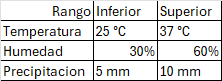

In [24]:
c1 = df3.loc[(dff.Temperature_C>=25) & (df3.Temperature_C<=37) & (df3.Humidity_pct>=30) & (df3.Humidity_pct<=60)& (df3.Precipitation_mm>=5) & (df3.Precipitation_mm<=10), ["Month","Location"]]
c1.info()
print()
print(c1["Location"].unique())
print()
print(c1["Month"].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 46751 entries, 5 to 786449
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     46751 non-null  object
 1   Location  46751 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB

['San Diego' 'New York' 'Philadelphia' 'San Antonio' 'San Jose' 'Houston'
 'Chicago' 'Los Angeles' 'Phoenix' 'Dallas']

['Enero' 'Marzo' 'Mayo' 'Febrero' 'Abril']


###### Caso 2: Ciertas condiciones climáticas pueden causar sensación de calor sofocante, riesgo elevado de golpes de calor y deshidratación en los seres humanos. También en animales se presenta estrés térmico elevado y necesidad de acceso a agua y sombra.
###### Se presentan con las siguientes condiciones:
   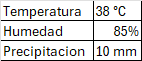


In [25]:
c2 = df3.loc[(df3.Temperature_C>=38) & (df3.Humidity_pct>=85) & (df3.Precipitation_mm>=10)& (df3.Precipitation_mm<=20), ["Month","Humidity_pct","Precipitation_mm","Location","Temperature_C","Date_Time"]]
c2

,Month,Humidity_pct,Precipitation_mm,Location,Temperature_C,Date_Time
109305,Enero,88.723707,13.167934,Phoenix,39.037619,2024-01-20 04:12:00
706437,Enero,87.918377,10.793128,Phoenix,38.393201,2024-01-29 05:11:00


###### Caso 3: Condiciones climáticas severas sin protección adecuada ponen al ser humano en peligro de muerte por frío extremo (hipotermia).
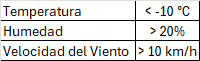

In [26]:
c3 = df3.loc[(dff.Temperature_C<=-10) & (df3.Humidity_pct>=20) & (df3.Wind_Speed_kmh>=10), ["Month","Location","Date_Time","Temperature_C","Humidity_pct","Wind_Speed_kmh"]]
c3.info()
print()
print(c3["Location"].unique())
print()
print(c3["Month"].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 2298 entries, 493 to 785975
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Month           2298 non-null   object        
 1   Location        2298 non-null   object        
 2   Date_Time       2298 non-null   datetime64[ns]
 3   Temperature_C   2298 non-null   float64       
 4   Humidity_pct    2298 non-null   float64       
 5   Wind_Speed_kmh  2298 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 125.7+ KB

['Phoenix']

['Enero' 'Febrero']


#### 3.3 Crear nuevas columnas derivadas de los datos existentes (e.g., calcular la sensación térmica a partir de la temperatura y la humedad).


In [27]:
#Cálculo de sensación térmica
dff['Wind chill'] = 13.12 + 0.6215 * dff['Temperature_C'] - 11.37 * (dff['Wind_Speed_kmh'] ** 0.16) + 0.3965 * (dff['Temperature_C']) * (dff['Wind_Speed_kmh'] ** 0.16)
dff

,Location,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Month,Year,Wind chill
0,San Diego,10.683001,41.195754,4.020119,8.233540,Enero,2024,9.763202
1,San Diego,8.734140,58.319107,9.111623,27.715161,Mayo,2024,5.094567
2,San Diego,11.632436,38.820175,4.607511,28.732951,Mayo,2024,8.784649
3,Philadelphia,-8.628976,54.074474,3.183720,26.367303,Febrero,2024,-17.210662
4,San Antonio,39.808213,72.899908,9.598282,29.898622,Abril,2024,45.462881
...,...,...,...,...,...,...,...,...
786464,New York,20.245916,31.677558,9.801482,24.029331,Enero,2024,20.143930
786465,New York,4.210758,45.683075,2.053384,22.351735,Febrero,2024,-0.210086
786466,San Jose,14.067557,45.668296,0.296306,11.883972,Enero,2024,13.256251
786467,Dallas,23.416877,37.705024,3.819833,16.538119,Enero,2024,24.406905


In [28]:
# Cálculo de punto de rocio
dff['dew_point'] = (dff['Temperature_C'] - ((100 -  dff['Humidity_pct']) / 5)).round().astype(int)
dff

,Location,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Month,Year,Wind chill,dew_point
0,San Diego,10.683001,41.195754,4.020119,8.233540,Enero,2024,9.763202,-1
1,San Diego,8.734140,58.319107,9.111623,27.715161,Mayo,2024,5.094567,0
2,San Diego,11.632436,38.820175,4.607511,28.732951,Mayo,2024,8.784649,-1
3,Philadelphia,-8.628976,54.074474,3.183720,26.367303,Febrero,2024,-17.210662,-18
4,San Antonio,39.808213,72.899908,9.598282,29.898622,Abril,2024,45.462881,34
...,...,...,...,...,...,...,...,...,...
786464,New York,20.245916,31.677558,9.801482,24.029331,Enero,2024,20.143930,7
786465,New York,4.210758,45.683075,2.053384,22.351735,Febrero,2024,-0.210086,-7
786466,San Jose,14.067557,45.668296,0.296306,11.883972,Enero,2024,13.256251,3
786467,Dallas,23.416877,37.705024,3.819833,16.538119,Enero,2024,24.406905,11


In [29]:
dff['Wind_Speed_knots'] = (dff['Wind_Speed_kmh'] / 1.852).round().astype(int)
dff

,Location,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Month,Year,Wind chill,dew_point,Wind_Speed_knots
0,San Diego,10.683001,41.195754,4.020119,8.233540,Enero,2024,9.763202,-1,4
1,San Diego,8.734140,58.319107,9.111623,27.715161,Mayo,2024,5.094567,0,15
2,San Diego,11.632436,38.820175,4.607511,28.732951,Mayo,2024,8.784649,-1,16
3,Philadelphia,-8.628976,54.074474,3.183720,26.367303,Febrero,2024,-17.210662,-18,14
4,San Antonio,39.808213,72.899908,9.598282,29.898622,Abril,2024,45.462881,34,16
...,...,...,...,...,...,...,...,...,...,...
786464,New York,20.245916,31.677558,9.801482,24.029331,Enero,2024,20.143930,7,13
786465,New York,4.210758,45.683075,2.053384,22.351735,Febrero,2024,-0.210086,-7,12
786466,San Jose,14.067557,45.668296,0.296306,11.883972,Enero,2024,13.256251,3,6
786467,Dallas,23.416877,37.705024,3.819833,16.538119,Enero,2024,24.406905,11,9


#### 3.4 Guardar el DataFrame modificado como archivo de Excel.


In [30]:
dff.to_excel('Weather_data-2.xlsx')

### 4. Visualización de Datos Automatizada

#### 4.1 Implementar funciones que generen gráficos utilizando Matplotlib para visualizar tendencias temporales y distribuciones de datos.


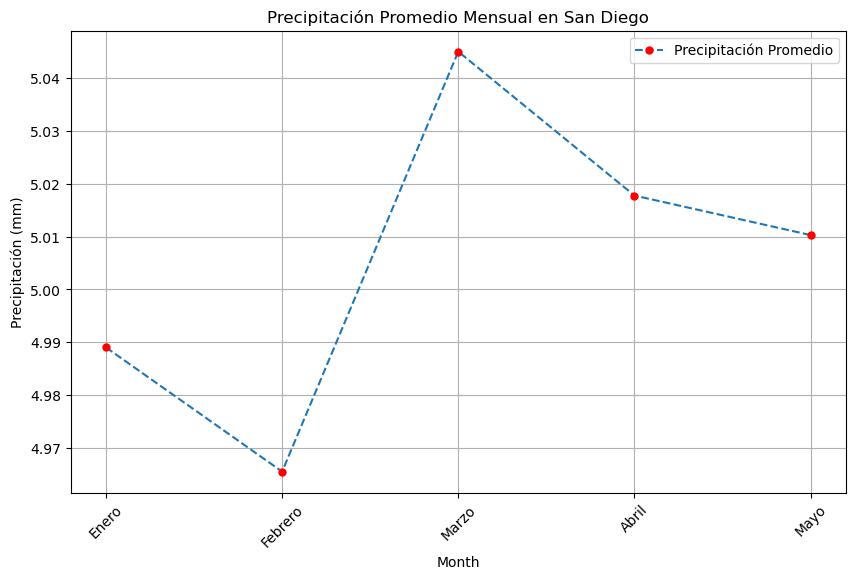

In [31]:
#Función para definir la temperatura promedio por mes según la ciudad
def plot_Tmonthmean(df, city):
    df_city = df[df['Location'] == city]
    mesnum = {"Enero": 1, "Febrero": 2, "Marzo": 3, "Abril": 4, "Mayo": 5}
    df_city['Mes_num'] = df_city['Month'].map(mesnum)
    mean_temp = df_city.groupby('Mes_num')['Precipitation_mm'].mean().reset_index()
   
#Crear el gráfico de líneas
    plt.figure(figsize=(10, 6))
    plt.plot(mean_temp['Mes_num'], mean_temp['Precipitation_mm'], marker='o',ms=5,mfc="red",markeredgecolor="red",linestyle='--', label='Precipitación Promedio')
    plt.xlabel('Month')
    plt.ylabel('Precipitación (mm)')
    plt.title(f'Precipitación Promedio Mensual en {city}')
    plt.xticks(ticks=list(mesnum.values()), labels=list(mesnum.keys()), rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()


plot_Tmonthmean(dff,'San Diego')

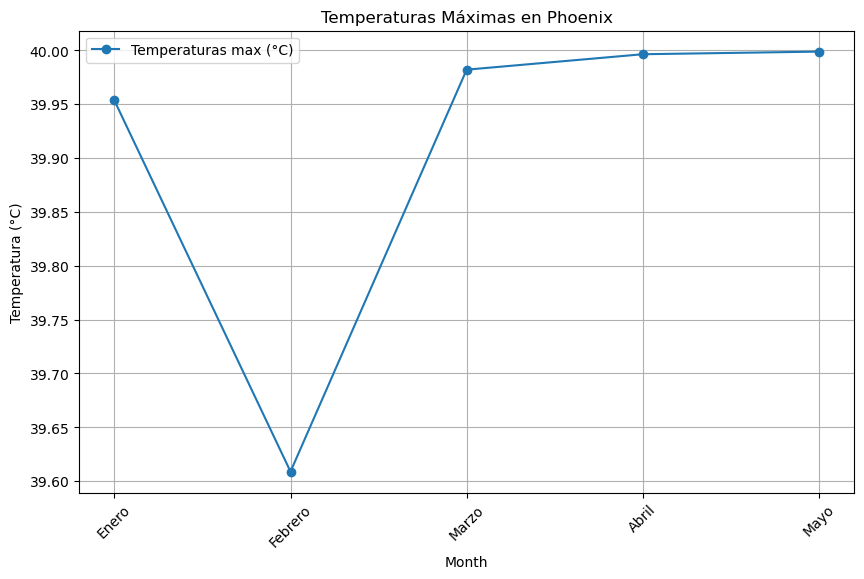

In [32]:
#Función para definir la temperatura máxima por mes según la ciudad
def plot_precmaxmensual(df, city):
    df_city = df[df['Location'] == city]
    mesnum = {"Enero": 1, "Febrero": 2, "Marzo": 3, "Abril": 4, "Mayo": 5}
    df_city['Mes_num'] = df_city['Month'].map(mesnum)
    max_prec = df_city.groupby('Mes_num')['Temperature_C'].max().reset_index()

# Crear el gráfico de líneas
    #fig,ax=plt.subplots(1,3,figsize=(12,8))
    plt.figure(figsize=(10, 6))
    plt.plot(max_prec['Mes_num'], max_prec['Temperature_C'], marker='o', linestyle='-', label='Temperaturas max (°C)')
    plt.xlabel('Month')
    plt.ylabel('Temperatura (°C)')
   # plt.ylim(-30, 50) 
    plt.title(f'Temperaturas Máximas en {city}')
    plt.xticks(ticks=list(mesnum.values()), labels=list(mesnum.keys()), rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()


plot_precmaxmensual(dff,'Phoenix')

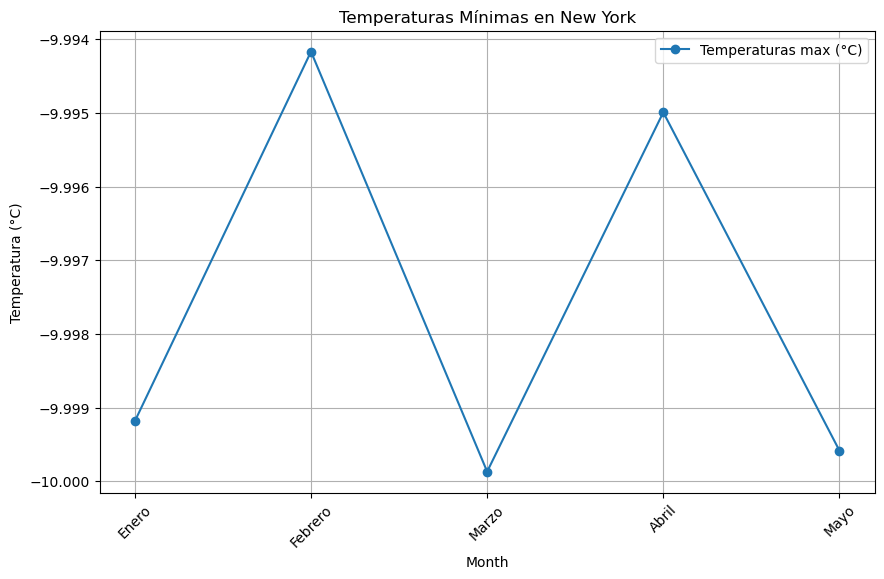

In [33]:
#Función para definir la temperatura máxima por mes según la ciudad
def plot_precminmensual(df, city):
    df_city = df[df['Location'] == city]
    mesnum = {"Enero": 1, "Febrero": 2, "Marzo": 3, "Abril": 4, "Mayo": 5}
    df_city['Mes_num'] = df_city['Month'].map(mesnum)
    max_prec = df_city.groupby('Mes_num')['Temperature_C'].min().reset_index()

# Crear el gráfico de líneas
    #fig,ax=plt.subplots(1,3,figsize=(12,8))
    plt.figure(figsize=(10, 6))
    plt.plot(max_prec['Mes_num'], max_prec['Temperature_C'], marker='o', linestyle='-', label='Temperaturas max (°C)')
    plt.xlabel('Month')
    plt.ylabel('Temperatura (°C)')
   # plt.ylim(-30, 50) 
    plt.title(f'Temperaturas Mínimas en {city}')
    plt.xticks(ticks=list(mesnum.values()), labels=list(mesnum.keys()), rotation=45)
    plt.grid(True)
    plt.legend()
    plt.show()


plot_precminmensual(dff,'New York')

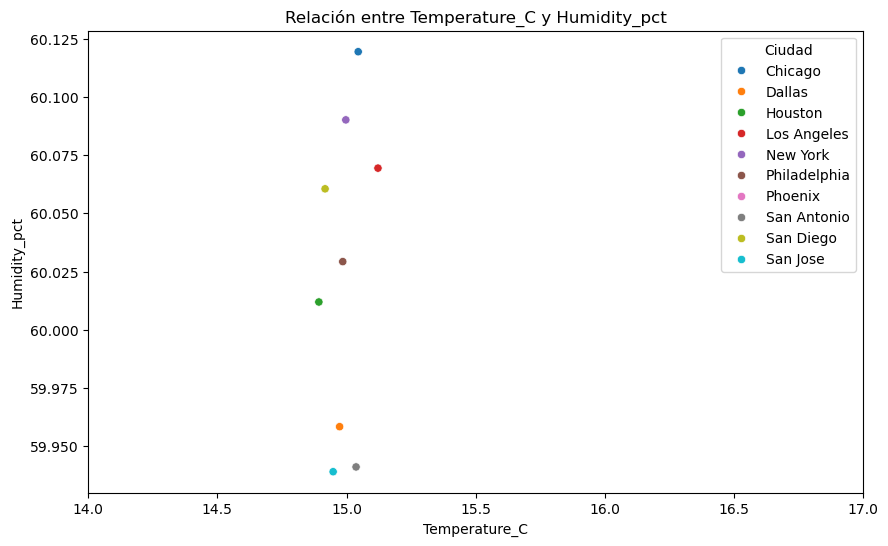

In [34]:
def scatter_city(df, v1,v2):
    plt.figure(figsize=(10, 6))
    mn = df.groupby('Location')[[v1, v2]].mean().reset_index()
    sns.scatterplot(x= mn[v1], y= mn[v2], hue=mn['Location'], data=mn)
    plt.xlabel(v1)
    plt.ylabel(v2)
    plt.xlim(14, 17)
    plt.title(f'Relación entre {v1} y {v2}')
    plt.legend(title='Ciudad')
    plt.show()


scatter_city(dff,'Temperature_C','Humidity_pct')

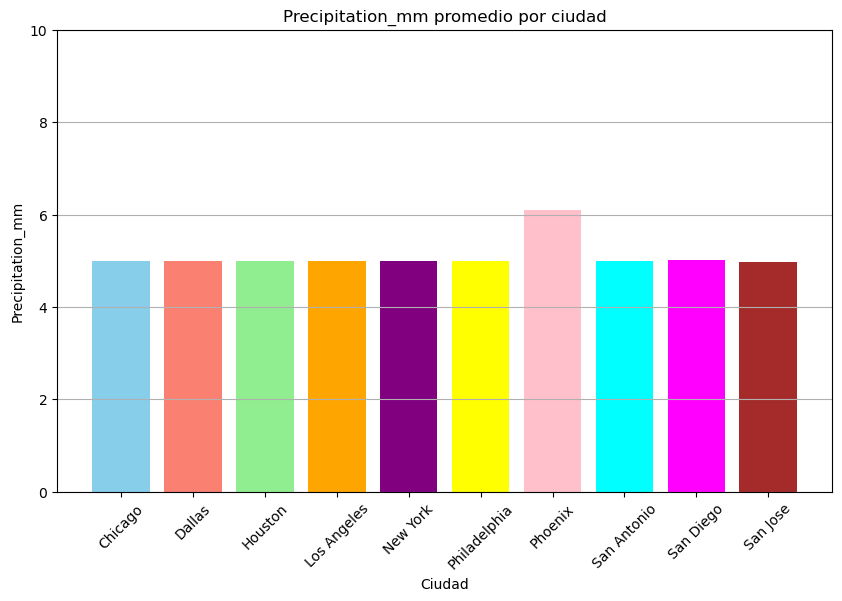

In [35]:
#Funcion para definir la variable promedio por ciudad
def bar_city(df, variabl):
    plt.figure(figsize=(10, 6))
    mean_prec = df.groupby('Location')[variabl].mean().reset_index()
    colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple', 'yellow', 'pink', 'cyan', 'magenta', 'brown']
    plt.bar(mean_prec['Location'], mean_prec[variabl], color=colors)
    plt.xlabel('Ciudad')
    plt.ylabel(variabl)
    plt.ylim(0, 10) 
    plt.title(f'{variabl} promedio por ciudad')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()


bar_city(dff,'Precipitation_mm')

#### 4.2 Implementar funciones que generen gráficos tales como: diagramas de caja y bigote, gráficos de barras, gráficos de dispersión, entre otros utilizando Seaborn.

In [36]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786469 entries, 0 to 786468
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Location          786469 non-null  object 
 1   Temperature_C     786469 non-null  float64
 2   Humidity_pct      786469 non-null  float64
 3   Precipitation_mm  786469 non-null  float64
 4   Wind_Speed_kmh    786469 non-null  float64
 5   Month             786469 non-null  object 
 6   Year              786469 non-null  int32  
 7   Wind chill        786469 non-null  float64
 8   dew_point         786469 non-null  int32  
 9   Wind_Speed_knots  786469 non-null  int32  
dtypes: float64(5), int32(3), object(2)
memory usage: 51.0+ MB


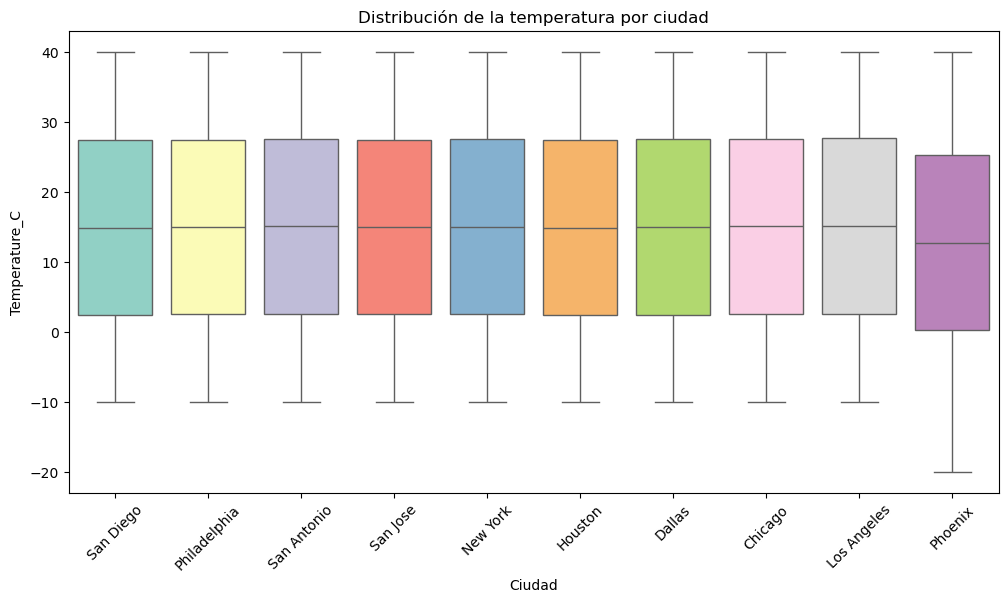

In [37]:
def grafbox(das,variabl):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=das["Location"], y=das[variabl],saturation=0.9,data=das, palette="Set3")
    plt.xlabel('Ciudad')
    plt.ylabel(variabl)
    plt.title('Distribución de la temperatura por ciudad')
    plt.xticks(rotation=45)
    plt.show()

grafbox(dff,'Temperature_C')

#### 4.3 Usar bucles para generar y guardar múltiples gráficos, por ejemplo, un gráfico por cada ciudad o por cada año.

In [38]:
# Función para definir la temperatura máxima por mes según la ciudad
def plot_precmeanmensualP(df, city):
    df_city = df[df['Location'] == city]
    mesnum = {"Enero": 1, "Febrero": 2, "Marzo": 3, "Abril": 4, "Mayo": 5}
    df_city['Mes_num'] = df_city['Month'].map(mesnum)
    mean_temp = df_city.groupby('Mes_num')['Temperature_C'].mean().reset_index()
       
    plt.figure(figsize=(10, 6))
    plt.plot(mean_temp['Mes_num'], mean_temp['Temperature_C'], marker='o', linestyle='-', label='Temperatura Promedio')
    plt.xlabel('Month')
    plt.ylabel('Temperatura (°C)')
    plt.title(f'Temperatura Promedio Mensual en {city}')
    plt.xticks(ticks=list(mesnum.values()), labels=list(mesnum.keys()), rotation=45)
    plt.grid(True)
    plt.legend()
    plt.savefig(f'{city}_Temperatura_Promedio_Mensual.png')
    plt.show()


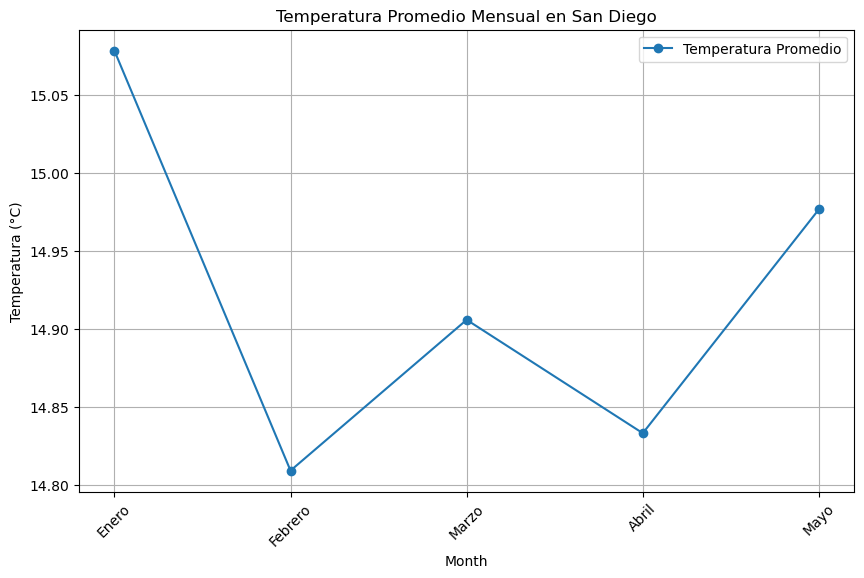

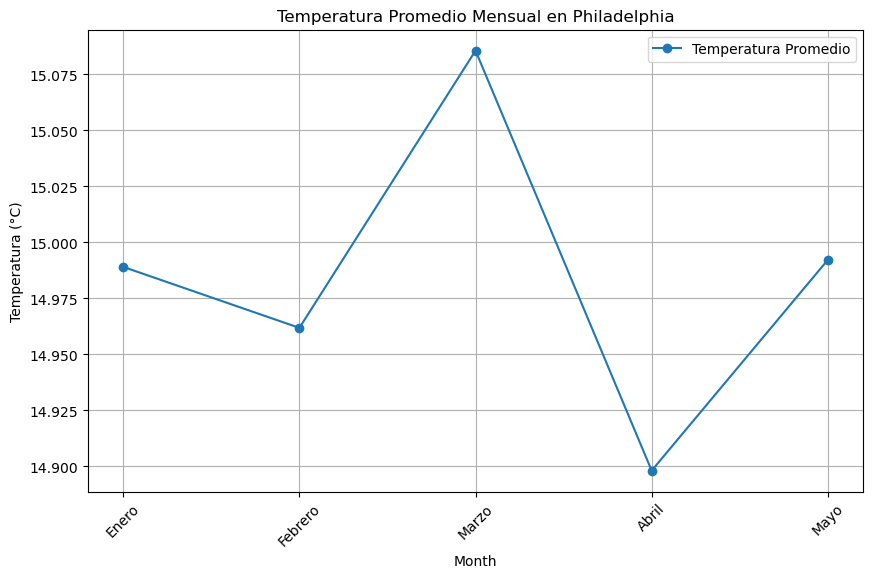

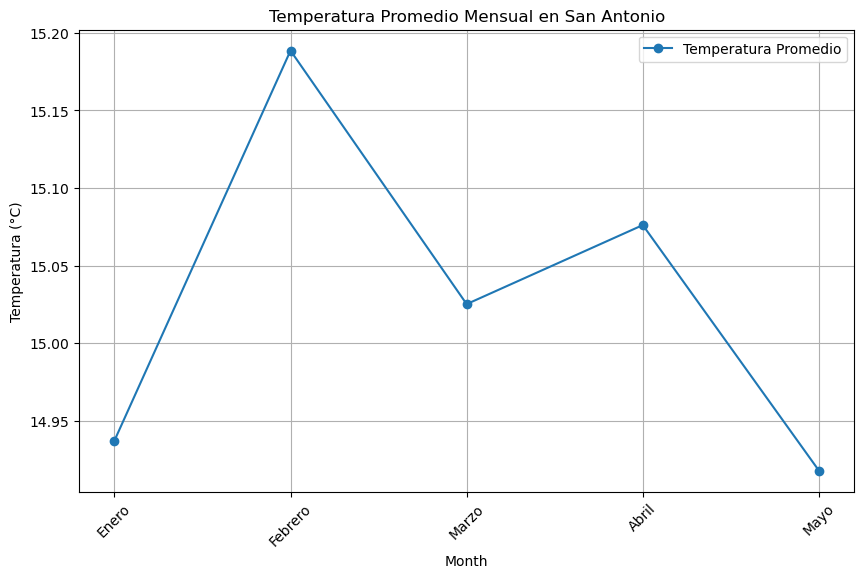

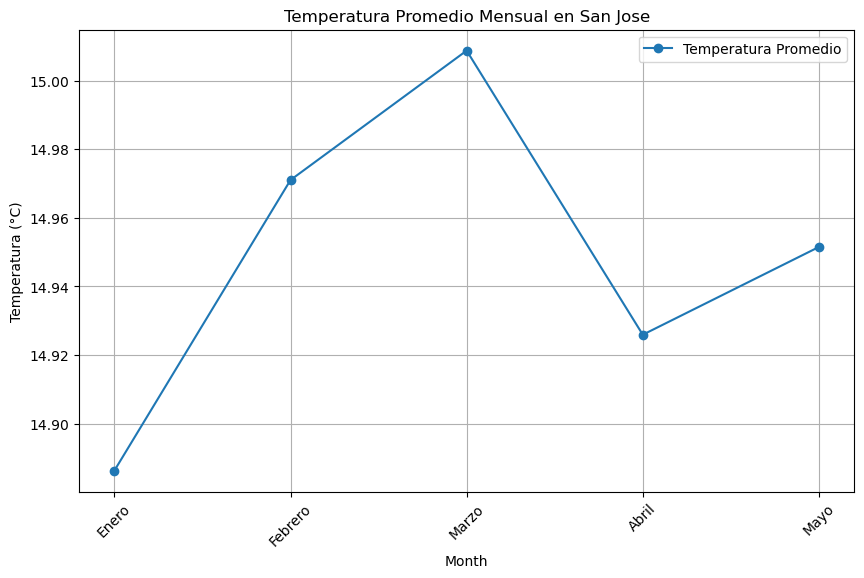

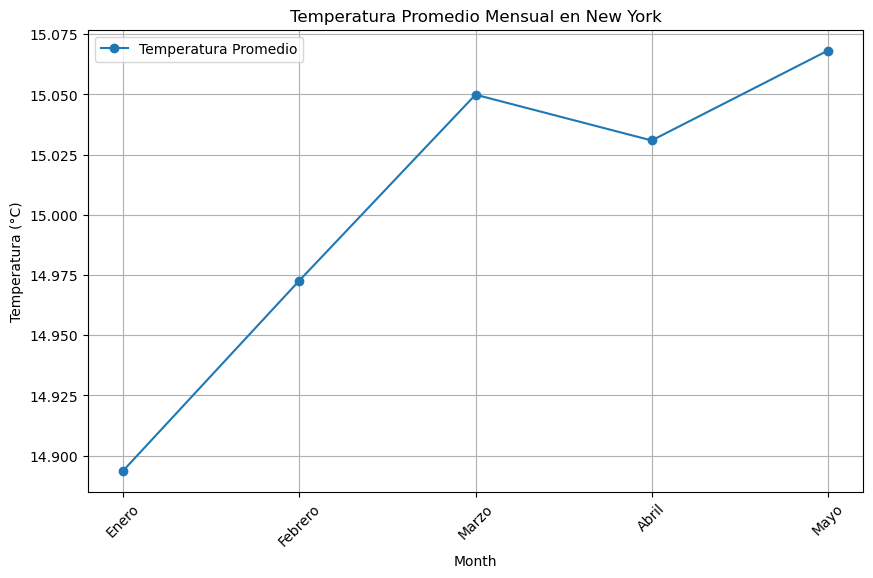

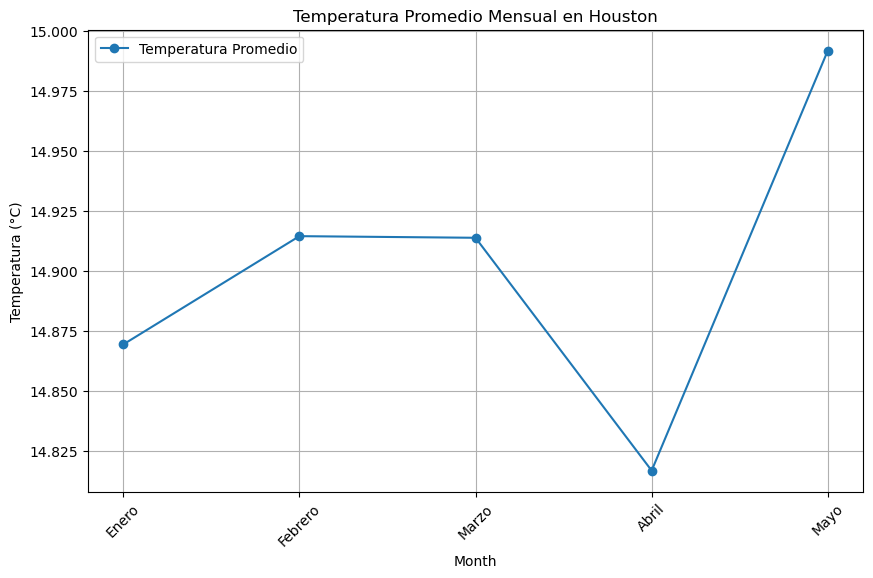

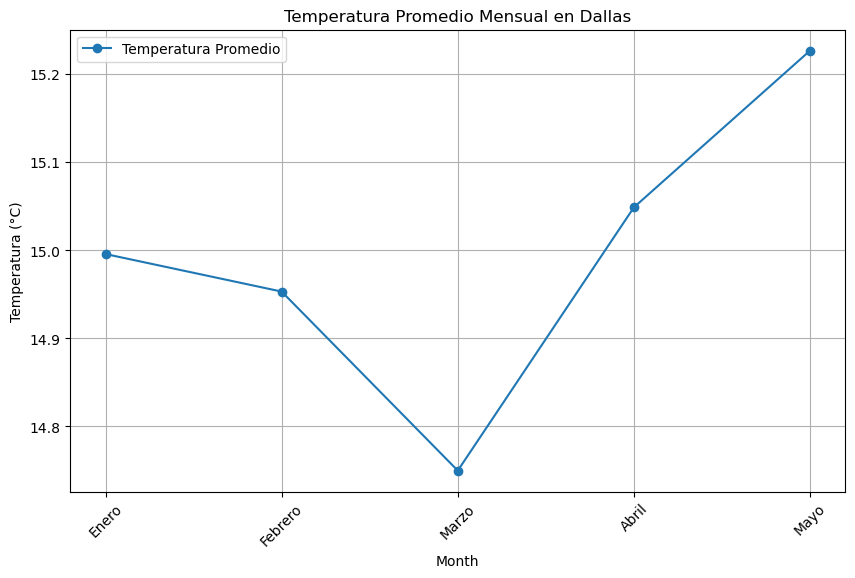

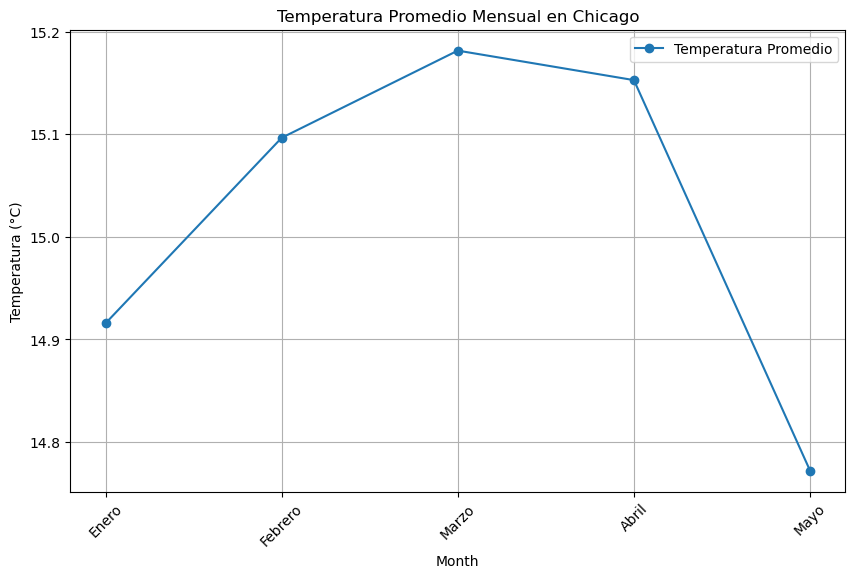

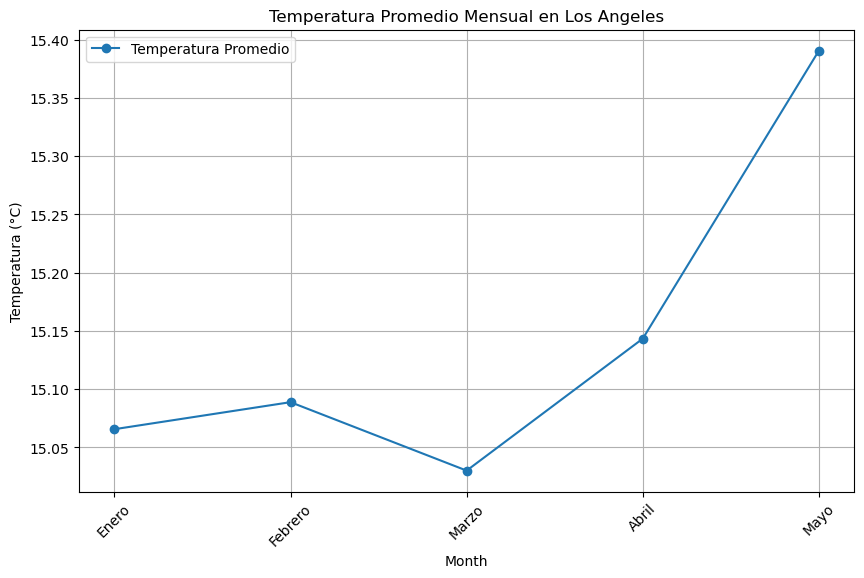

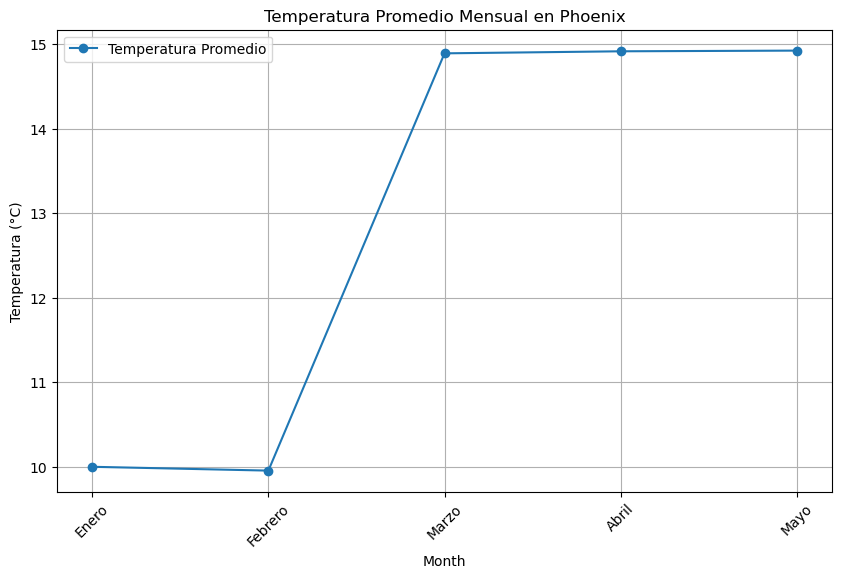

In [39]:
cities = dff["Location"].unique()
for city in cities:
    plot_precmeanmensualP(dff, city)
    plt.close()

In [40]:
# Función para crear gráficos y guardarlos
def variable_city(dat,variable):
    mean_var = dat.groupby('Location')[variable].mean().reset_index()
    month_order = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo']
    dat['Month'] = pd.Categorical(dat['Month'], categories=month_order, ordered=True)
    cities= mean_var['Location'].unique()
    for city in cities:
        city_data = dat[dat['Location'] == city]
        # Crear un gráfico para la temperatura
        plt.figure(figsize=(10, 6))
        sns.lineplot(x='Month', y=variable, data=city_data, marker='o',color='green')
        plt.title(f'Sensacion térmica en {city}')
        plt.xlabel('Mes')
        plt.ylabel(variable)
        plt.xticks(rotation=45)
        plt.tight_layout()
        # plt.ylim(14.0, 16.0)
        plt.savefig(f'{variable}_{city}.png')
        plt.show()
        plt.close()

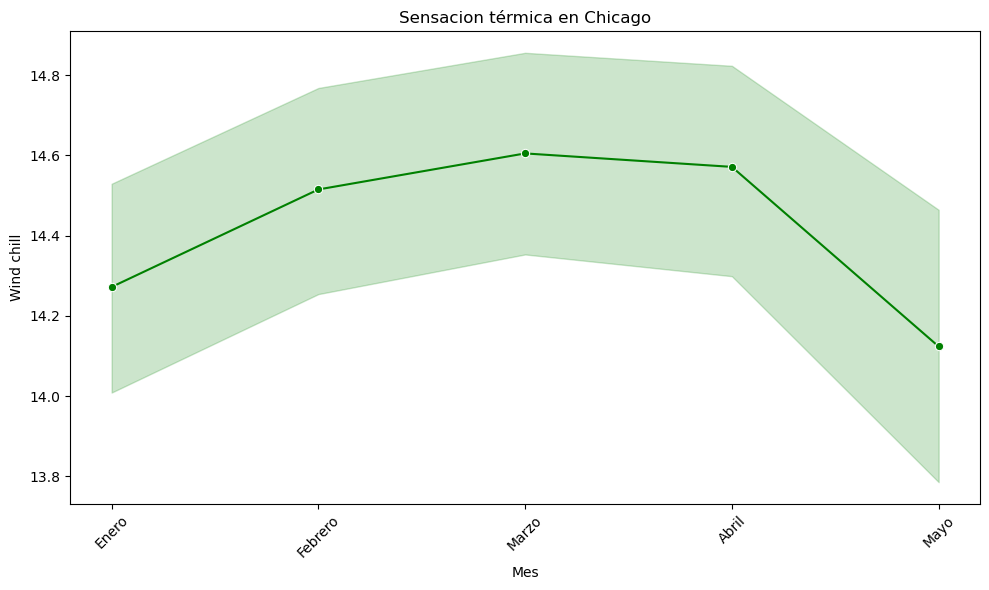

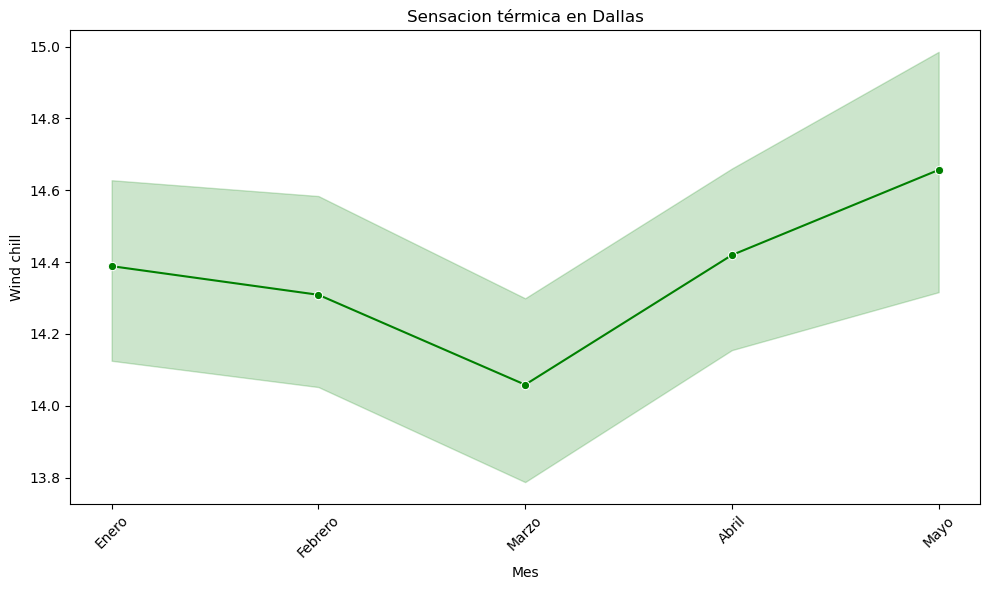

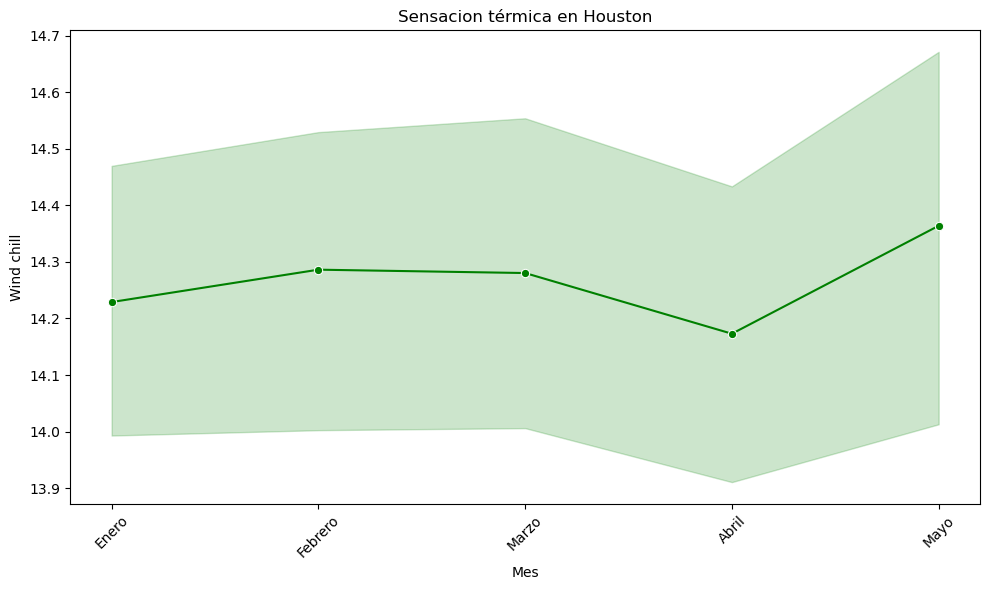

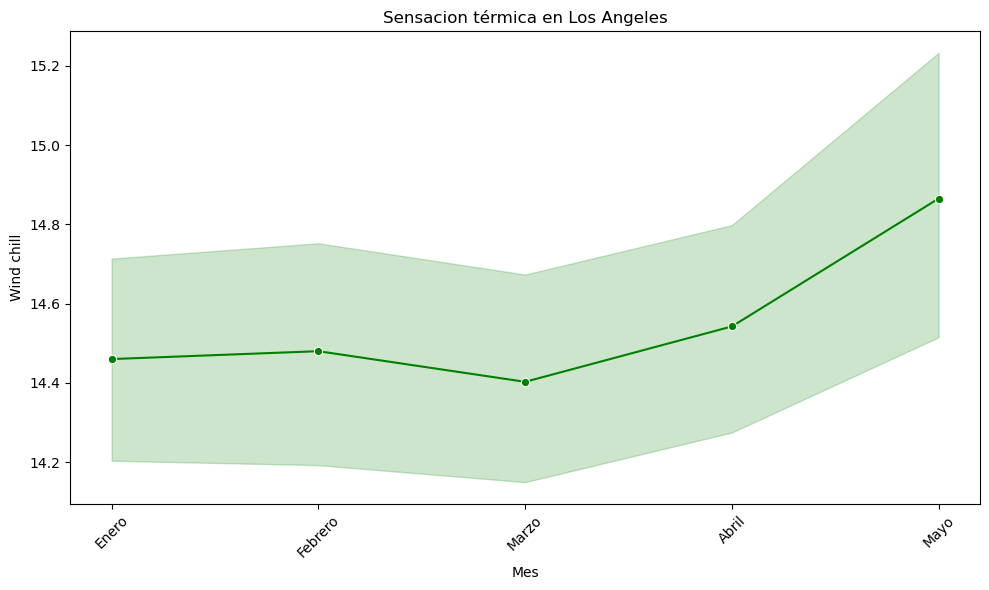

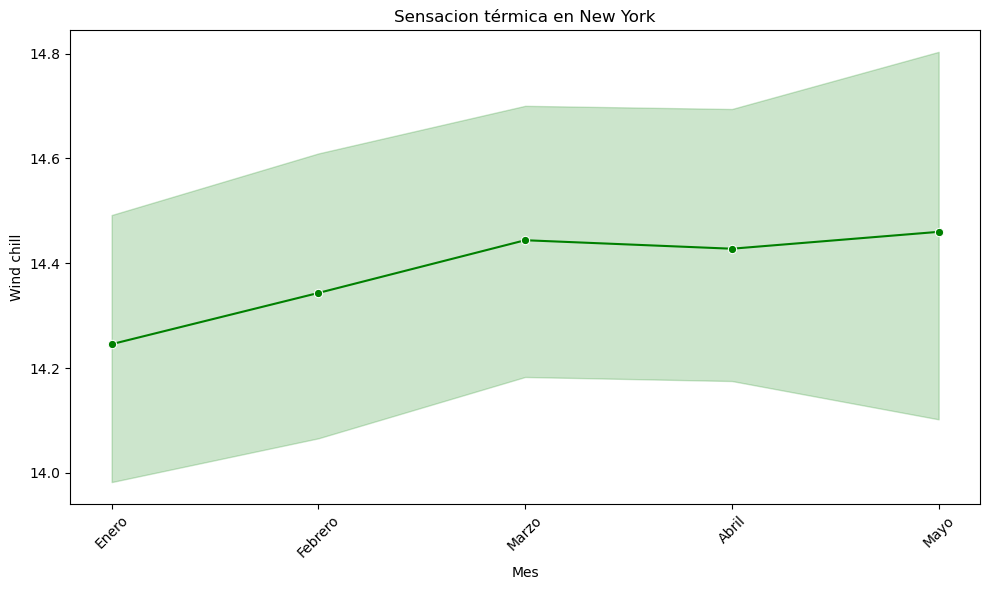

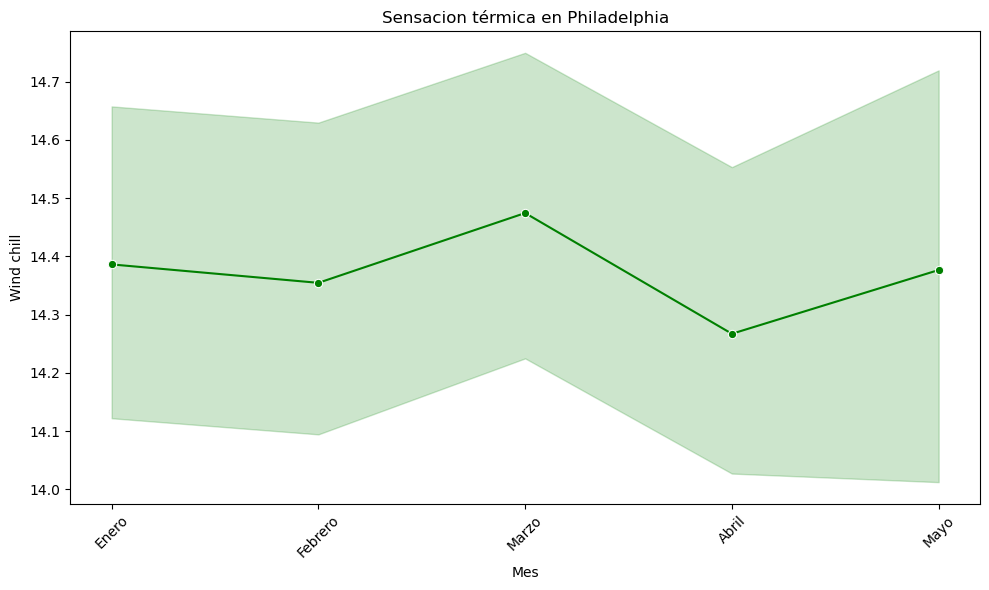

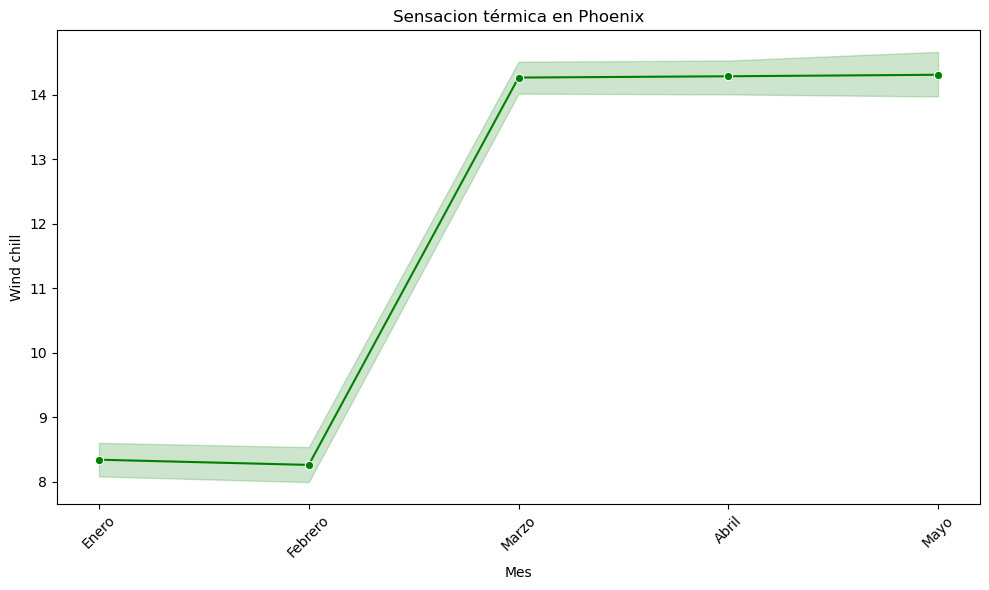

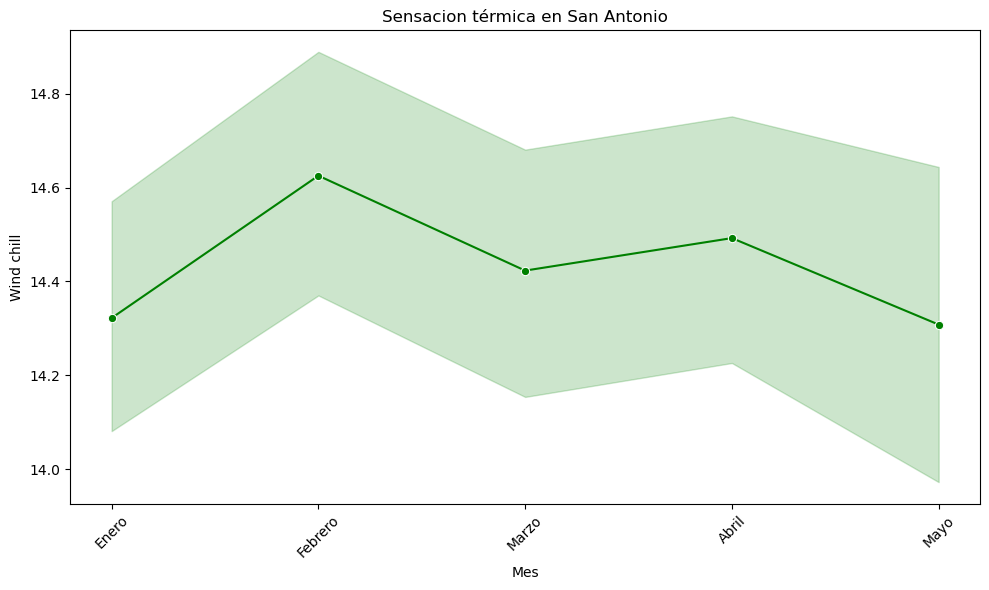

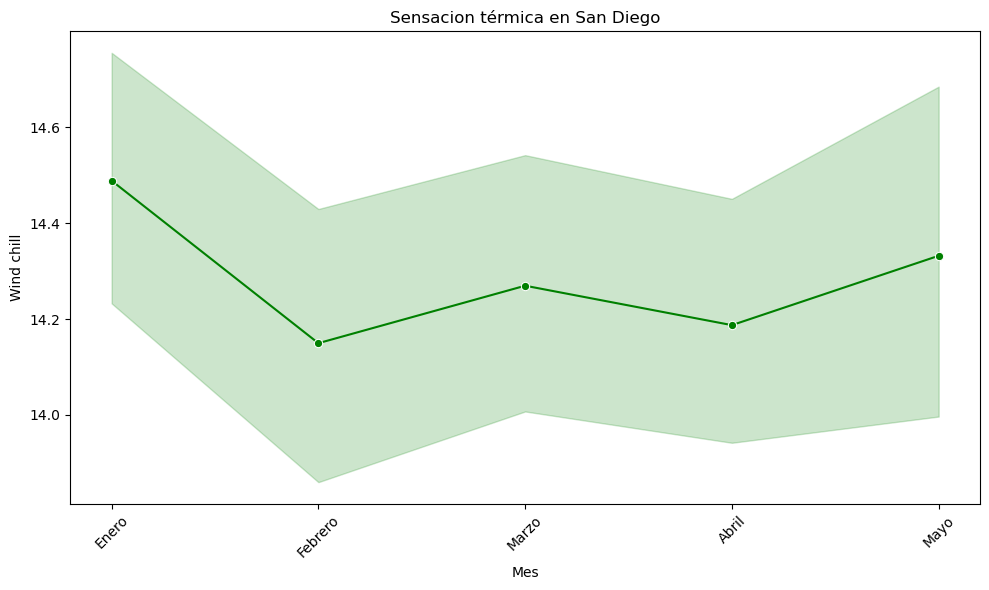

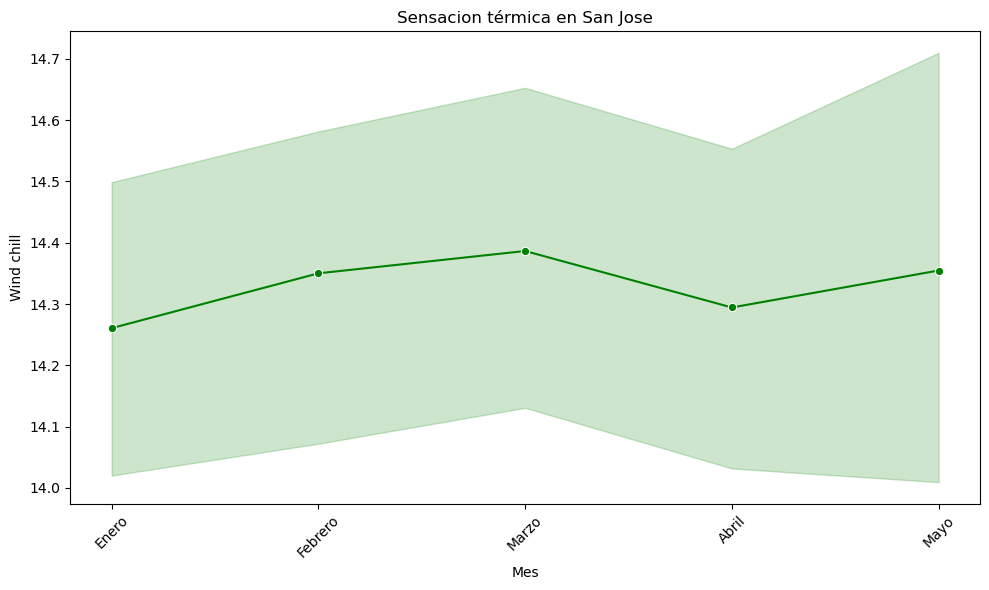

In [41]:
variable_city(dff,'Wind chill')

In [42]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786469 entries, 0 to 786468
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Location          786469 non-null  object  
 1   Temperature_C     786469 non-null  float64 
 2   Humidity_pct      786469 non-null  float64 
 3   Precipitation_mm  786469 non-null  float64 
 4   Wind_Speed_kmh    786469 non-null  float64 
 5   Month             786469 non-null  category
 6   Year              786469 non-null  int32   
 7   Wind chill        786469 non-null  float64 
 8   dew_point         786469 non-null  int32   
 9   Wind_Speed_knots  786469 non-null  int32   
dtypes: category(1), float64(5), int32(3), object(1)
memory usage: 45.8+ MB


### Resultados:
Dado el análisis realizado con Python, utilizando bibliotecas como Matplotlib y Seaborn para visualizar datos climáticos, los resultados obtenidos del DataFrame proporcionado incluyen los siguientes puntos:
- Se utilizó una función para calcular la media, mediana y desviación estándar de las variables climáticas dadas, como temperatura, humedad, precipitación y velocidad del viento. Se estima que la temperatura promedio es de 15 °C, la humedad del 60% y la velocidad del viento en 15 km/h. Estas estadísticas ayudaron a comprender las condiciones climáticas típicas y su variabilidad en las ciudades analizadas.
- Se implementaron funciones para analizar la distribución de cada variable por ciudad y así identificar extremos y variabilidad. Se observó que las tendencias de temperatura por ciudad de acuerdo a cada mes, mediante gráficos de línea y diagramas de cajas, son similares; es decir, no hay una variación signficativa, y todas las temperaturas mínimas, máximas y promedio oscilan en un rango similar.
- Se analizaron datos climáticos para identificar en qué ciudades se cumplen condiciones extremas.
- Utilizando los datos, se calculó la sensación térmica y el punto de rocío para cada muestra.
- Se definieron funciones para elaborar gráficos de línea que muestran la variación mensual de la precipitación en distintas ciudades, incluyendo datos mínimos, máximos y promedios. Estos gráficos indican que la mayoría de las ciudades presentan picos de precipitación en primavera y otoño, con mínimos en verano, lo que sugiere una influencia estacional marcada en las precipitaciones.
- Se puede comprobar variables que estan relacionadas como la temperatura y la sensacion termica las cuales no son directamente proporcional, pero estan relacionadas por el hecho que relaciona la velocidad del viento. El concepto clave detrás del "wind chill" es que el viento aumenta la pérdida de calor del cuerpo, haciendo que la temperatura se sienta más fría de lo que realmente es. Lo que se confirma en los graficos observados donde la sensacion termica da valores menores que la temperatura
- Se comprobó la relación entre variables gracias a los gráficos generados. Por ejemplo, la temperatura y la sensación térmica no son directamente proporcionales, pero están relacionadas por la velocidad del viento. El concepto clave detrás del "wind chill" es que el viento aumenta la pérdida de calor del cuerpo, haciendo que la temperatura se sienta más fría de lo que realmente es. Esto se confirma en los gráficos observados, donde la sensación térmica muestra valores menores que la temperatura real.


### Conclusiones y recomendaciones basadas en los hallazgos del análisis
- Las técnicas automatizadas demostraron ser eficaces para el análisis climático, permitiendo una evaluación más rápida y precisa de tendencias climáticas, sino también la identificación de manera precisa de patrones complejos y relaciones entre variables que serían difíciles de detectar manualmente por la cantidad de datos que tienen normalmente estos conjuntos de datos.
- Esta investigación demuestra cómo las técnicas automatizadas pueden ser implementadas efectivamente para el análisis climático, proponiendo un modelo replicable en otros estudios similares.
- Se recomienda siempre comprobar que la cantidad de registros por cada variable a analizar seas homogéneas, ya que diferencias significativas en el tamaño de las muestras pueden sesgar los resultados y dificultar comparaciones precisas entre ciudades.
- Uno de los casos evaluados identifica condiciones climáticas severas que sin protección adecuada ponen en peligro la vida por frío extremo. Phoenix presentó estas condiciones en los meses de enero y febrero, por lo que se recomienda el uso de ropa térmica y resguardarse adecuadamente cuando se presenten estas condiciones.

###  Referencias bibliográficas.
-	Ali, K. J., Ehsan, S., Tran, A., Haugstetter, M., & Singh, H. (2024). Diagnostic Excellence in the Context of Climate Change: A Review. The American Journal of Medicine. https://doi.org/10.1016/J.AMJMED.2024.06.010 
-	El Hachimi, C., Belaqziz, S., Khabba, S., Ousanouan, Y., Sebbar, B. eddine, Kharrou, M. H., & Chehbouni, A. (2023). ClimateFiller: A Python framework for climate time series gap-filling and diagnosis based on artificial intelligence and multi-source reanalysis data. Software Impacts, 18, 100575. https://doi.org/10.1016/J.SIMPA.2023.100575 
-	Frontiers. (2023). The Impact of Climate Change on Mental Health: A Systematic Descriptive Review. 
-	WHO. (2022). Why mental health is a priority for action on climate change. 
-	Psychiatry.org. (2022). How Extreme Weather Events Affect Mental Health. 